In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import matplotlib.image as mpimg
from PIL import Image
import json
import torch.nn as nn
from collections import OrderedDict


In [43]:
from __future__ import print_function, division

In [44]:
dataset_dir='flowers'

In [45]:
##def mtransLoad(dataset_dir, phase):
print("\n iTrace Begins - inside mtransLoad in ttrainer \n")
print("\n iTrace Begins - Normalising images with mean and SD for converting the values of each color channel to be between -1 and 1 instead of 0 and 1. \n")
print("\niTrace Rubric - one random scaling, Rotation, mirroring or cropping to (224x224 pix) in transform dictionary for three keys depending on training or validation\n")
##Check Phase and set training /testing/validation transform
 ##Check Phase and set training /testing/validation data sub dir

## if phase=='train':
print("\niTrace Training Phase and entered inside of train phase in mtransLoad \n")
train_transforms = transforms.Compose([
transforms.RandomRotation(43),
transforms.RandomHorizontalFlip(),
transforms.RandomVerticalFlip(),
transforms.RandomResizedCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
## trg_dir = dataset_dir + '/train/'
## print("\niTrace Training Phase in mtransLoad trg dir is  %s\n",trg_dir)

## train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms) 
## trainloader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)
## loaded_datasets = trainloader
## if phase=='valida':
print("\niTrace Validation Phase and entered inside of train phase in mtransLoad \n")
valid_transforms = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ])
## valid_data = datasets.ImageFolder(data_dir + '/valid', transform=valid_transforms)
## valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=2)
## loaded_datasets = valid_loader
## if phase=='test':
print("\niTrace Testing Phase and entered inside of train phase in mtransLoad \n")
test_transforms = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ])
## test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
## test_loader = torch.utils.data.DataLoader(test_data, batch_size=2)
## loaded_datasets = test_loader
## elif:
print("\niTrace Invalid Phase and now in else of phase in mtransLoad \n")
## create image dataset dictionary img_dsd
img_dsd = {'train':'','test':'','valid':''}
trg_val =datasets.ImageFolder(root=dataset_dir + '/train',transform=train_transforms)
tst_val =datasets.ImageFolder(root=dataset_dir + '/test',transform=test_transforms)
vali_val =datasets.ImageFolder(root=dataset_dir + '/valid',transform=valid_transforms)
img_dsd['train']= trg_val
img_dsd['test']= tst_val
img_dsd['valid']= vali_val

print("\niTrace Rubric - Loading data and Batch sizing, image dataset created \n")
print(img_dsd)
print("\niTrace Rubric - Loading data and Batch sizing, going to make loader \n")
    
trainloader = data.DataLoader(img_dsd['train'], batch_size=4, shuffle=True, num_workers=2)
testloader = data.DataLoader(img_dsd['test'], batch_size=4, num_workers=2)
validloader = data.DataLoader(img_dsd['valid'], batch_size=4, num_workers=2)


print("\niTrace completed - Loading data and Batch sizing,loader done  \n")

## train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
## test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
## trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
## testloader = torch.utils.data.DataLoader(test_data, batch_size=32)
## loaded_datasets = 'x'

##return img_dsd
trainloader = data.DataLoader(img_dsd['train'], batch_size=4, shuffle=True, num_workers=2)
testloader = data.DataLoader(img_dsd['test'], batch_size=4, num_workers=2)
validloader = data.DataLoader(img_dsd['valid'], batch_size=4, num_workers=2)


 iTrace Begins - inside mtransLoad in ttrainer 


 iTrace Begins - Normalising images with mean and SD for converting the values of each color channel to be between -1 and 1 instead of 0 and 1. 


iTrace Rubric - one random scaling, Rotation, mirroring or cropping to (224x224 pix) in transform dictionary for three keys depending on training or validation


iTrace Training Phase and entered inside of train phase in mtransLoad 


iTrace Validation Phase and entered inside of train phase in mtransLoad 


iTrace Testing Phase and entered inside of train phase in mtransLoad 


iTrace Invalid Phase and now in else of phase in mtransLoad 


iTrace Rubric - Loading data and Batch sizing, image dataset created 

{'train': Dataset ImageFolder
    Number of datapoints: 34
    Root Location: flowers/train
    Transforms (if any): Compose(
                             RandomRotation(degrees=(-43, 43), resample=False, expand=False)
                             RandomHorizontalFlip(p=0.5)
          

In [46]:
trg_val.samples

[('flowers/train/1/image_06736.jpg', 0),
 ('flowers/train/1/image_06741.jpg', 0),
 ('flowers/train/1/image_06744.jpg', 0),
 ('flowers/train/1/image_06750.jpg', 0),
 ('flowers/train/10/image_07087.jpg', 1),
 ('flowers/train/10/image_07096.jpg', 1),
 ('flowers/train/10/image_07098.jpg', 1),
 ('flowers/train/2/image_05091.jpg', 2),
 ('flowers/train/2/image_05097.jpg', 2),
 ('flowers/train/2/image_05106.jpg', 2),
 ('flowers/train/3/image_06614.jpg', 3),
 ('flowers/train/3/image_06616.jpg', 3),
 ('flowers/train/3/image_06618.jpg', 3),
 ('flowers/train/4/image_05634.jpg', 4),
 ('flowers/train/4/image_05636.jpg', 4),
 ('flowers/train/4/image_05637.jpg', 4),
 ('flowers/train/4/image_05638.jpg', 4),
 ('flowers/train/5/image_05161.jpg', 5),
 ('flowers/train/5/image_05164.jpg', 5),
 ('flowers/train/5/image_05167.jpg', 5),
 ('flowers/train/5/image_05174.jpg', 5),
 ('flowers/train/6/image_07165.jpg', 6),
 ('flowers/train/6/image_07169.jpg', 6),
 ('flowers/train/6/image_07178.jpg', 6),
 ('flowers/tr

In [47]:
len(trg_val.samples)

34

In [48]:
trg_val.classes

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

In [49]:
len(tst_val.samples)

55

In [50]:
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
    

In [51]:
class_names = list(cat_to_name.values())

In [52]:
class_names

['canterbury bells',
 'pink primrose',
 'moon orchid',
 'globe thistle',
 'tiger lily',
 'monkshood',
 'sweet pea',
 'hard-leaved pocket orchid',
 'english marigold',
 'bird of paradise']

In [53]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Using the image datasets, define the dataloaders
dataloaders = {
    x: data.DataLoader(img_dsd[x], batch_size=4, shuffle=True, num_workers=2)
    for x in list(img_dsd.keys())
}

In [54]:
inputs, classes = next(iter(dataloaders['train']))

Printing in Progress.Please wait. Progress 0%


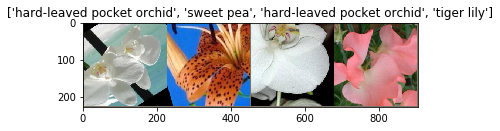

Printing completed 100%. Thanks for waiting.


In [55]:
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

labels = list(cat_to_name.values())

print("Printing in Progress.Please wait. Progress 0%")

imshow(out, title=[labels[x] for x in classes])

print("Printing completed 100%. Thanks for waiting.")

In [56]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [57]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in trainloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [58]:
model_ft = models.resnet18(pretrained=True)

In [59]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [60]:

num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 10)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [61]:
model_ft.parameters()

<generator object Module.parameters at 0x10f1f9200>

In [62]:
num_ftrs

512

In [63]:
model_ft.fc

Linear(in_features=512, out_features=10, bias=True)

In [64]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [65]:
criterion

CrossEntropyLoss()

In [66]:
optimizer_ft

SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.001
    lr: 0.001
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [67]:
exp_lr_scheduler

In [68]:
#For training
dataset_sizes ={'train':len(trg_val.samples),'test':len(tst_val.samples)}
                
#dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}

In [69]:
dataset_sizes

{'test': 55, 'train': 34}

In [70]:
dataloaders['train']=trg_val

In [71]:
dataloaders['test']=tst_val

In [72]:
for inputs, labels in trainloader:
                inputs 
                labels 

In [73]:
labels

tensor([ 1,  0])

In [74]:
inputs

tensor([[[[-1.0904, -1.0733, -1.0733,  ..., -1.0733, -1.0904, -1.0904],
          [-1.0904, -1.0733, -1.0733,  ..., -1.0733, -1.1247, -1.1247],
          [-1.0904, -1.0733, -1.0733,  ..., -1.0904, -1.1247, -1.1418],
          ...,
          [-0.9363, -0.9363, -0.9534,  ..., -1.3473, -0.1828,  0.4508],
          [-0.9192, -0.9192, -0.9705,  ..., -1.4158, -0.1143,  0.3823],
          [-0.9020, -0.9020, -0.9534,  ..., -1.5870, -0.4739,  0.2796]],

         [[-0.7402, -0.7227, -0.7227,  ..., -0.7227, -0.7052, -0.6877],
          [-0.7402, -0.7227, -0.7227,  ..., -0.7227, -0.7402, -0.7227],
          [-0.7402, -0.7227, -0.7227,  ..., -0.7402, -0.7402, -0.7402],
          ...,
          [-0.4601, -0.4601, -0.4951,  ..., -1.0028,  0.1352,  0.7304],
          [-0.4426, -0.4426, -0.4951,  ..., -1.0903,  0.2052,  0.6779],
          [-0.4251, -0.4251, -0.4776,  ..., -1.3179, -0.1975,  0.5903]],

         [[-0.7587, -0.7238, -0.7238,  ..., -0.7936, -0.7936, -0.7761],
          [-0.7587, -0.7238, -

In [75]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------
train Loss: 2.5881 Acc: 0.0588
test Loss: 1.2286 Acc: 0.1636

Epoch 1/4
----------
train Loss: 2.1565 Acc: 0.2941
test Loss: 0.9345 Acc: 0.3636

Epoch 2/4
----------
train Loss: 1.9234 Acc: 0.3824
test Loss: 0.6738 Acc: 0.5273

Epoch 3/4
----------
train Loss: 1.4765 Acc: 0.5000
test Loss: 0.5080 Acc: 0.4364

Epoch 4/4
----------
train Loss: 1.1175 Acc: 0.7353
test Loss: 0.2918 Acc: 0.5636

Training complete in 1m 2s
Best val Acc: 0.000000


In [76]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [77]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=25)

Epoch 0/24
----------
train Loss: 2.5911 Acc: 0.0588
test Loss: 1.2785 Acc: 0.2000

Epoch 1/24
----------
train Loss: 2.0753 Acc: 0.3235
test Loss: 0.9140 Acc: 0.4000

Epoch 2/24
----------
train Loss: 1.5947 Acc: 0.6176
test Loss: 0.5975 Acc: 0.5818

Epoch 3/24
----------
train Loss: 1.2479 Acc: 0.7647
test Loss: 0.3469 Acc: 0.5455

Epoch 4/24
----------
train Loss: 0.9464 Acc: 0.8235
test Loss: 0.3158 Acc: 0.5636

Epoch 5/24
----------
train Loss: 1.0175 Acc: 0.8235
test Loss: 0.2779 Acc: 0.5636

Epoch 6/24
----------
train Loss: 0.6502 Acc: 0.9118
test Loss: 0.1192 Acc: 0.6000

Epoch 7/24
----------
train Loss: 0.4876 Acc: 0.9706
test Loss: 0.1380 Acc: 0.6000

Epoch 8/24
----------
train Loss: 0.6552 Acc: 0.7941
test Loss: 0.1077 Acc: 0.6000

Epoch 9/24
----------
train Loss: 0.4843 Acc: 0.9412
test Loss: 0.0869 Acc: 0.6182

Epoch 10/24
----------
train Loss: 0.5053 Acc: 0.9412
test Loss: 0.0762 Acc: 0.6182

Epoch 11/24
----------
train Loss: 0.5388 Acc: 0.9118
test Loss: 0.1411 Acc

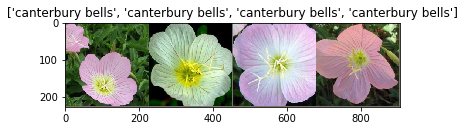

In [79]:
def cust_viz(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(validloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

cust_viz(out, title=[class_names[x] for x in classes])

In [80]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(testloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                cust_viz(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

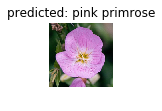

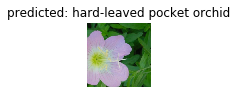

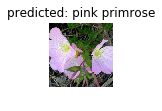

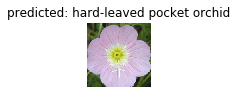

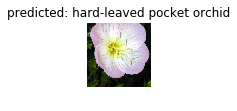

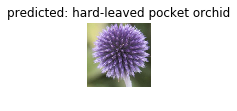

In [81]:
visualize_model(model_ft)

In [82]:
model_ft.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
                          1.7083e-02, -1.2694e-02],
                        [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
                         -1.2907e-01,  3.7424e-03],
                        [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
                          2.5632e-01,  6.3573e-02],
                        ...,
                        [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
                         -4.2058e-01, -2.5781e-01],
                        [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
                          3.9359e-01,  1.6606e-01],
                        [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
                         -8.2230e-02, -5.7828e-03]],
              
                       [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
                          6.6221

In [100]:
print("\n To Save\n")

checkpoint = {
    'arch': 'resnet18',
    'state_dict': model_ft.state_dict()
}

torch.save(checkpoint, 'TTLearnPYTOffBasedRes18smsampFlower22Jul18V1-22jul-ite2.pt')

print("\nSaved\n")


 To Save


Saved

